# A/B testing in mobile games

A/B testing, also known as split testing, is a widely used method in the gaming industry to optimize various aspects of computer games. The primary motivation is to make data-driven decisions that improve the overall player experience and maximize the game's success.

The choice of metric depends on the specific objectives of the A/B test. Common metrics in computer games include player retention, daily active users (DAU), session length, churn rate, conversion rate, revenue per user (ARPU), pay-to-play ratio, user engagement, load times, bug reports, player feedback, ad click-through rate (CTR), social sharing, funnel metrics, level completion rate, and virality. These metrics help game developers assess player engagement, monetization effectiveness, performance, and overall user satisfaction.

## Scope
All analysis will be conducted on data collected for the mobile puzzle game, Cookie Cats. In this classic "connect three" puzzle, players must strategically link tiles of identical colors to clear the board and advance through levels.

## Performance metrics

The following metrics are available and will be evaluated:

1. **sum_gamerounds**: the number of game rounds played by the player during the first 14 days after install.
2. **retention_1**: did the player come back and play 1 day after installing?
3. **retention 7**: did the player come back and play 7 days after installing?

# Data exploration

## Dependencies

In [1]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\ab-testing-cookie-cats\\ab-testing-cookie-cats'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)
    
import config
from IPython.display import display
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-muted')
import numpy as np
import pandas as pd
from random import sample

## Import data
* Data is imported as a DataFrame.
* There are 90,1089 records.

In [2]:
ab_results = pd.read_csv(config.file_directory('raw') + 'cookie_cats.csv')
print(f"Number of records: {ab_results.shape[0]}")
ab_results.head(3)

Number of records: 90189


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


## Data types
* sum_gamerounds is a numerical variable and both retention metrics are boolean.

In [3]:
ab_results.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

## Missing values
* No missing values (NaN or None) are present.

In [4]:
ab_results.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

## A/B split

* The *version* feature indicates the A/B split.
* Two values are present: gate_40 and gate_30. The data is split roughly 50/50 across these two groups.

In [5]:
display(ab_results[['version']].describe())

,version
count,90189
unique,2
top,gate_40
freq,45489


In [6]:
from custom_funcs import perc_func
version_breakdown = perc_func(ab_results, 'version')
version_breakdown

,count,perc
version,,
gate_40,45489,50.4
gate_30,44700,49.6


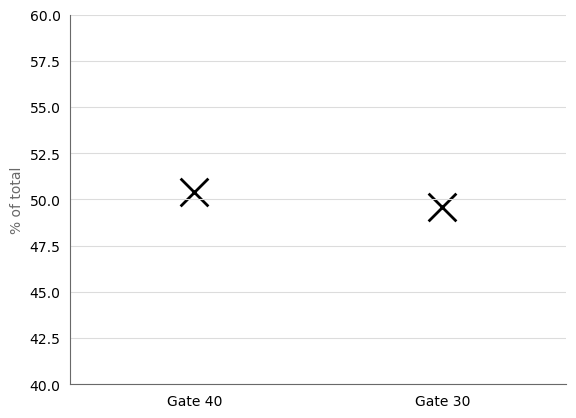

In [7]:
fig, axes = plt.subplots()
axes.scatter(version_breakdown.index,
           version_breakdown['perc'],
           marker='x',
           s=400,
           c='black',
           linewidths=2)

axes.set_xlim([-0.5, 1.5])
axes.set_ylim([round(min(version_breakdown['perc']) - 10, -1),
             round(max(version_breakdown['perc']) + 10, -1)])
axes.tick_params(bottom=False, left=False)
axes.set_xticks([0, 1], ['Gate 40', 'Gate 30'])
axes.grid(True, axis='y', color='gainsboro')
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
axes.set_ylabel('% of total', color='dimgray');

## Summary stats & distributions

### Number of game rounds

In [8]:
display(ab_results[['sum_gamerounds']].describe())

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [9]:
display(pd.concat([ab_results.loc[ab_results.version == v, 'sum_gamerounds'].describe() for v in ab_results['version'].unique()],
                  axis=1,
                  keys=[v for v in ab_results['version'].unique()]
                 )
       )

,gate_30,gate_40
count,44700.000000,45489.000000
mean,52.456264,51.298776
std,256.716423,103.294416
min,0.000000,0.000000
25%,5.000000,5.000000
50%,17.000000,16.000000
75%,50.000000,52.000000
max,49854.000000,2640.000000


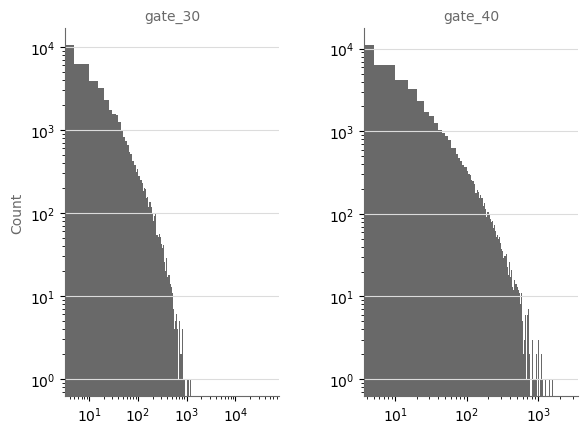

In [10]:
bin_width = 5
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.0)

for v, ax in zip(ab_results['version'].unique(), axes):
    ax.hist(ab_results.loc[ab_results.version == v, 'sum_gamerounds'],
            bins=range(0, ab_results.loc[ab_results.version == v, 'sum_gamerounds'].max() + bin_width, bin_width),
            color = 'dimgray')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(True, axis='y', color='gainsboro')
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
    ax.set_title(v, fontsize=10, color='dimgray')
axes[0].set_ylabel('Count', color='dimgray');

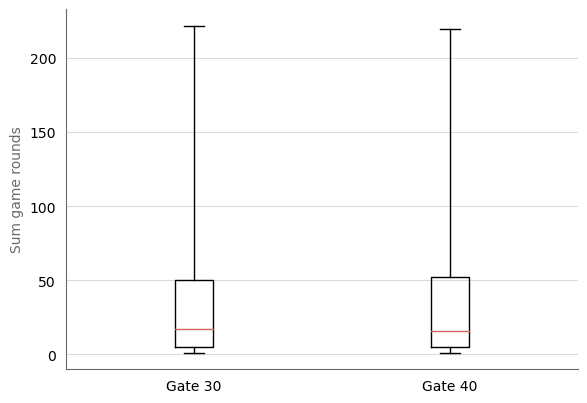

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1)
ab_results.boxplot(by='version',
                   column='sum_gamerounds',
                   ax=axes,
                   whis=[5, 95],
                   showfliers=False,
                   boxprops=dict(color='k'),
                   whiskerprops=dict(color='k'),
                   capprops=dict(color='k')
                   )
axes.set_xticks([1, 2], labels=['Gate 30', 'Gate 40'])
axes.set_xlabel('')
axes.set_ylabel('Sum game rounds', fontsize=10, color='dimgray')
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.grid(True, axis='y', which='major', color='gainsboro')
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
axes.set_title('')
fig.suptitle('');

### One day retention

In [12]:
display(ab_results[['retention_1']].describe())

,retention_1
count,90189
unique,2
top,False
freq,50036


In [17]:
from custom_funcs import retained_func
retent_outcomes = retained_func(ab_results, 'retention_1')
# retent_outcomes.xs(True, level=1, axis=0).xs('perc', level=1, axis=1)
retent_outcomes

retention_1       
                      count   perc
version outcome                   
gate_30 False         24666  55.18
        True          20034  44.82
gate_40 False         25370  55.77
        True          20119  44.23

In [ ]:
fig, axes = plt.subplots()
axes.scatter(retent1_breakdown.index,
             retent1_breakdown['perc'],
             marker='x',
             s=400,
             c='black',
             linewidths=2)

axes.set_xlim([-0.5, 1.5])
axes.set_ylim([round(min(retent1_breakdown['perc']) - 10, -1),
             round(max(retent1_breakdown['perc']) + 10, -1)])
axes.tick_params(bottom=False, left=False)
axes.set_xticks([0, 1], ['Not retained', 'Retained'])
axes.grid(True, axis='y', color='gainsboro')
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
axes.set_ylabel('% of total', color='dimgray');

### Seven day retention

In [ ]:
display(ab_results[['retention_7']].describe())

In [ ]:
retent7_breakdown = perc_func(ab_results, 'retention_7')
display(retent7_breakdown)

In [ ]:
fig, axes = plt.subplots()
axes.scatter(retent7_breakdown.index,
             retent7_breakdown['perc'],
             marker='x',
             s=400,
             c='black',
             linewidths=2)

axes.set_xlim([-0.5, 1.5])
axes.set_ylim([round(min(retent7_breakdown['perc']) - 10, -1),
             round(max(retent7_breakdown['perc']) + 10, -1)])
axes.tick_params(bottom=False, left=False)
axes.set_xticks([0, 1], ['Not retained', 'Retained'])
axes.grid(True, axis='y', color='gainsboro')
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
axes.set_ylabel('% of total', color='dimgray');

**Numerical features**

In [ ]:
display(ab_results[['sum_gamerounds']].describe())

In [ ]:
bin_width = 5
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.0)

axes[0].hist(ab_results['sum_gamerounds'],
             bins=range(0, ab_results['sum_gamerounds'].max() + bin_width, bin_width),
             color = 'dimgray')   
axes[1].hist(ab_results['sum_gamerounds'],
             bins=range(0, ab_results['sum_gamerounds'].max() + bin_width, bin_width),
             color = 'dimgray')
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[0].tick_params(left=False)
axes[0].set_ylabel('Count', color='dimgray');
for ax in axes:
    ax.grid(True, axis='y', color='gainsboro')
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
fig.suptitle('Histogram for sum game rounds', fontsize=10, color='dimgray');

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.0)

axes[0].boxplot(ab_results['sum_gamerounds'], whis=[5, 95])
axes[1].boxplot(ab_results['sum_gamerounds'], whis=[5, 95], showfliers=False)
axes[0].set_title('With outliers', fontsize=10, color='dimgray')
axes[0].set_ylabel('Sum game rounds', fontsize=10, color='dimgray')
axes[1].set_title('Without outliers', fontsize=10, color='dimgray')
for ax in axes:
    ax.set_xticks([1], labels=[]);
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, axis='y', color='gainsboro')
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')

### Feature relationships

#### Sum game rounds versus version

In [ ]:
display(pd.concat([ab_results.loc[ab_results.version == v, 'sum_gamerounds'].describe() for v in ab_results['version'].unique()],
                  axis=1,
                  keys=[v for v in ab_results['version'].unique()]
                 )
       )

In [ ]:
bin_width = 5
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=3.0)

for v, ax in zip(ab_results['version'].unique(), axes):
    ax.hist(ab_results.loc[ab_results.version == v, 'sum_gamerounds'],
            bins=range(0, ab_results.loc[ab_results.version == v, 'sum_gamerounds'].max() + bin_width, bin_width),
            color = 'dimgray')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(True, axis='y', color='gainsboro')
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
    ax.set_title(v, fontsize=10, color='dimgray')
axes[0].set_ylabel('Count', color='dimgray');

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1)
ab_results.boxplot(by='version',
                   column='sum_gamerounds',
                   ax=axes,
                   whis=[5, 95],
                   showfliers=False,
                   boxprops=dict(color='k'),
                   whiskerprops=dict(color='k'),
                   capprops=dict(color='k')
                   )
axes.set_xticks([1, 2], labels=['Gate 30', 'Gate 40'])
axes.set_xlabel('')
axes.set_ylabel('Sum game rounds', fontsize=10, color='dimgray')
axes.tick_params(bottom=False, left=False)
axes.grid(False)
axes.grid(True, axis='y', which='major', color='gainsboro')
axes.spines[['top', 'right']].set_visible(False)
axes.spines[['left', 'bottom']].set_color('dimgray')
axes.set_title('')
fig.suptitle('');

#### Retention versus version

In [ ]:
def outcomes_func(x, measure):
    """Calculate retention outcome counts and percentages for a given measure. 
    Where x is the raw results DataFrame and measure is either retention_1 or retention_7
    """
    df = x.groupby(by=['version', measure])['userid'].count().rename('count')
    df.index = df.index.rename(['version', 'outcome'])
    df = df.reset_index(level='outcome').join(
        x.groupby(by=['version'])['userid'].count().rename('total'))
    df['perc'] = round(df['count'] / df['total'] * 100, 2)
    
    df = df.set_index('outcome', append=True).drop('total', axis=1)
    df.columns = pd.MultiIndex.from_product([[measure], df.columns])
    return df

retent_outcomes = outcomes_func(ab_results, 'retention_1').join(outcomes_func(ab_results, 'retention_7'))
retent_outcomes.xs(True, level=1, axis=0).xs('perc', level=1, axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax, measure in zip(axes, ['retention_1', 'retention_7']):
    perc_view = retent_outcomes.xs(True, level=1, axis=0).xs('perc', level=1, axis=1)[measure]
    ax.scatter(perc_view.index,
               perc_view.values,
               marker='x',
               s=400,
               c='black',
               linewidths=2)
    
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim(
        [round(min(perc_view.values) - 10, -1),
         round(max(perc_view.values) + 10, -1)])
    ax.set_xticks([0, 1], ['Gate 30', 'Gate 40'])
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, axis='y', color='gainsboro')
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('dimgray')
    ax.set_title(measure, fontsize=10, color='dimgray')
axes[0].set_ylabel('% of total', color='dimgray');

## Data cleaning

In [ ]:
ab_results = ab_results.loc[ab_results['sum_gamerounds'] != ab_results['sum_gamerounds'].max()]
ab_results = ab_results.reset_index(drop=True)

## Permutation test

In [ ]:
def perm_func(x, n_A, n_B):
    """Compute difference in means for """
    n = n_A + n_B
    idx_A = set(sample(range(n), n_A))
    idx_B = set(range(n)) - idx_A
    return x.loc[list(idx_A)].mean() - x.loc[list(idx_B)].mean()

### Game rounds played

In [ ]:
display(summarise_data(ab_results, 'version'))

In [ ]:
gate_30_mean = ab_results.loc[ab_results['version'] == 'gate_30', 'sum_gamerounds'].mean()
gate_40_mean = ab_results.loc[ab_results['version'] == 'gate_40', 'sum_gamerounds'].mean()
obs_pct_diff = gate_30_mean - gate_40_mean
print(f'Gate 30 mean: {gate_30_mean}')
print(f'Gate 40 mean: {gate_40_mean}')
print(f'Observed percentage difference: {obs_pct_diff}')

In [ ]:
perm_diffs = [perm_func(ab_results['sum_gamerounds'], 44699, 45489) for _ in range(1000)]

fig, axes = plt.subplots()
axes.hist(perm_diffs, bins=20, color = 'dimgray', ec="white", lw=1)
axes.axvline(x=obs_pct_diff, linestyle='--', color='red', lw=2, label='Observed\ndifference')

axes.set_xlabel('Difference in avg number of game rounds', color='dimgray');
axes.set_ylabel('Count', color='dimgray');
axes.set_title('Game rounds', fontsize=10, color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
axes.legend();

In [ ]:
p_val = np.mean([diff > obs_pct_diff for diff in perm_diffs])
print(f'p-Value: {p_val}')

### 1 day retention

In [ ]:
retent_outcomes = outcomes_func(ab_results, 'retention_1').join(outcomes_func(ab_results, 'retention_7'))
retent_outcomes.xs('retention_1', level=0, axis=1)

In [ ]:
obs_pct_diff = 44.82 - 44.23
print(f'Observed percentage difference: {obs_pct_diff}')

In [ ]:
not_retained = [0] * (24665 + 25370)
retained = [1] * (20034 + 20119)
perm_diffs = [100 * perm_func(pd.Series(not_retained + retained), 44699, 45489) for _ in range(1000)]

fig, axes = plt.subplots()
axes.hist(perm_diffs, bins=20, color = "dimgray", ec="white", lw=1)
axes.axvline(x=obs_pct_diff, linestyle='--', color='red', lw=2, label='Observed\ndifference')

axes.set_xlabel('Difference in retention rate', color='dimgray');
axes.set_ylabel('Count', color='dimgray');
axes.set_title('One day retention', fontsize=10, color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
axes.legend();

In [ ]:
p_val = np.mean([diff > obs_pct_diff for diff in perm_diffs])
print(f'p-Value: {p_val}')

### 7 day retention

In [ ]:
retent_outcomes = outcomes_func(ab_results, 'retention_1').join(outcomes_func(ab_results, 'retention_7'))
retent_outcomes.xs('retention_7', level=0, axis=1)

In [ ]:
obs_pct_diff = 19.02 - 18.20
print(f'Observed percentage difference: {obs_pct_diff}')

In [ ]:
not_retained = [0] * (36198 + 37210)
retained = [1] * (8501 + 8279)
perm_diffs = [100 * perm_func(pd.Series(not_retained + retained), 44699, 45489) for _ in range(1000)]

fig, axes = plt.subplots()
axes.hist(perm_diffs, bins=20, color = "dimgray", ec="white", lw=1)
axes.axvline(x=obs_pct_diff, linestyle='--', color='red', lw=2, label='Observed\ndifference')

axes.set_xlabel('Difference in retention rate', color='dimgray');
axes.set_ylabel('Count', color='dimgray');
axes.set_title('Seven day retention', fontsize=10, color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
axes.legend();

In [ ]:
p_val = np.mean([diff > obs_pct_diff for diff in perm_diffs])
print(f'p-Value: {p_val}')

## Conclusion